In [33]:
from hyrax import Hyrax

h = Hyrax(config_file='./astrominn_testing_runtime_config.toml')
h.config['train']['epochs'] = 15

[2025-11-24 12:46:06,211 hyrax.config_utils:INFO] Merging external default config from /home/drew/code/applecider/src/applecider/default_config.toml
[2025-11-24 12:46:06,221 hyrax.config_utils:WARNING] Runtime config contains key or section 'train' which has no default defined. All configuration keys and sections must be defined in /home/drew/code/hyrax/src/hyrax/hyrax_default_config.toml
[2025-11-24 12:46:06,222 hyrax.config_utils:WARNING] Runtime config contains key or section 'infer' which has no default defined. All configuration keys and sections must be defined in /home/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


In [34]:
ds = h.prepare()

[2025-11-24 12:46:09,692 hyrax.prepare:INFO] Finished Prepare


In [35]:
h.set_config('model.AstroMiNN.use_probabilities', False)
m = h.train()

[2025-11-24 12:46:19,717 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-11-24 12:46:19,718 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-11-24 12:46:19,719 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-11-24 12:46:19,719 hyrax.config_utils:INFO] Merging external default config from /home/drew/code/applecider/src/applecider/default_config.toml
[2025-11-24 12:46:22,657 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.
[2025-11-24 12:46:22,658 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2025-11-24 12:46:22,658 hyrax.verbs.train:INFO] Training model: AstroMiNN
[2025-11-24 12:46:22,659 hyrax.verbs.train:INFO] Training dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: applecide

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

  6%|5         | 1/17 [00:00<?, ?it/s]

[2025-11-24 12:47:07,833 hyrax.pytorch_ignite:INFO] Total training time: 45.09[s]
2025/11/24 12:47:07 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/11/24 12:47:07 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-11-24 12:47:08,010 hyrax.verbs.train:INFO] Finished Training


In [36]:
h.set_config('model.AstroMiNN.use_probabilities', True)
infer_ds = h.infer()

[2025-11-24 12:51:39,863 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-11-24 12:51:39,864 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-11-24 12:51:39,865 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-11-24 12:51:39,865 hyrax.config_utils:INFO] Merging external default config from /home/drew/code/applecider/src/applecider/default_config.toml
[2025-11-24 12:51:42,177 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.
[2025-11-24 12:51:42,178 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2025-11-24 12:51:42,179 hyrax.verbs.infer:INFO] Inference model: AstroMiNN
[2025-11-24 12:51:42,179 hyrax.verbs.infer:INFO] Inference dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: appleci

  2%|2         | 1/41 [00:00<?, ?it/s]

[2025-11-24 12:51:46,347 hyrax.pytorch_ignite:INFO] Total evaluation time: 3.02[s]
[2025-11-24 12:51:46,526 hyrax.verbs.infer:INFO] Inference Complete.


In [37]:
import numpy as np
res_list = []

for i in range(41):
    a = np.load(f"/home/drew/code/applecider/docs/pre_executed/testing/results/20251124-124047-infer-6vp1/batch_{i}.npy")

    for i in a:
        max_ind = np.argmax(i['tensor'])
        res_list.append((str(i['id']), int(max_ind)))

In [38]:
import numpy as np
import glob

CLASSES = [
    ['SN Ia','SN Ic','SN Ib'],
    ['SN IIP', 'SN IIn','SN II', 'SN IIb'],
    ['Cataclysmic'],
    ['AGN'],
    ['Tidal Disruption Event']
]

real_class = []
pred_class = []
for k, v in res_list:
    pred_class.append(v)

    # get all files in data directory that start with k
    files = glob.glob(f"/home/drew/code/applecider/data/ztf23_processed_data/{k}*.npy")
    b = np.load(files[0], allow_pickle=True)

    target = b.item().get('target')
    for i, c in enumerate(CLASSES):
        if target in c:
            target_class = i
            break

    real_class.append(target_class)


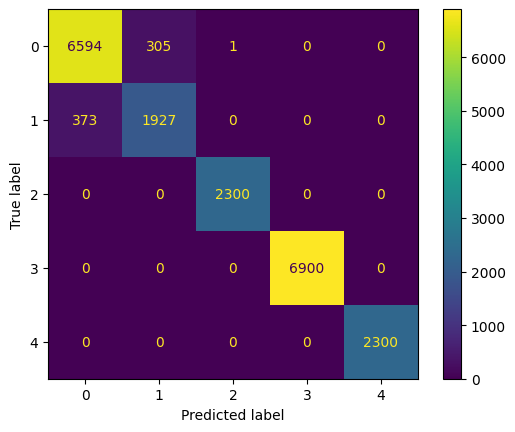

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(real_class, pred_class)).plot()